In [ ]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import re
#pd.set_option("display.max_rows", None, "display.max_columns", None)

In [14]:
!ls
data=pd.read_csv('amazon_phone_dataset.csv')

amazon_phone_dataset.csv  sample_data


# Data Details

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9570 entries, 0 to 9569
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product_name   4176 non-null   object
 1   by_info        4167 non-null   object
 2   Product_url    9570 non-null   object
 3   Product_img    2935 non-null   object
 4   Product_price  2926 non-null   object
 5   rating         3439 non-null   object
 6   total_review   3441 non-null   object
 7   ans_ask        2349 non-null   object
 8   prod_des       3414 non-null   object
 9   feature        4157 non-null   object
 10  cust_review    3442 non-null   object
dtypes: object(11)
memory usage: 822.5+ KB


In [ ]:
data.describe()

,Product_name,by_info,Product_url,Product_img,Product_price,rating,total_review,ans_ask,prod_des,feature,cust_review
count,4176,4167,9570,2935,2926,3439,3441,2349,3414,4157,3442
unique,3607,1235,9568,2420,812,45,572,357,2428,3118,2556
top,"Smart Fitness Band, Muzili Activity Tracker wi...",Amazon Renewed,TASLAR,https://images-na.ssl-images-amazon.com/images...,₹ 299.00,5.0 out of 5 stars,1 customer review,1000+ answered questions,This Renewed Product has been tested to work a...,NOTE : BUY FROM NKARTA TO GET ORIGINAL AND PRE...,Good***
freq,5,96,2,7,204,390,381,189,33,18,11


In [ ]:
data.head()

,Product_name,by_info,Product_url,Product_img,Product_price,rating,total_review,ans_ask,prod_des,feature,cust_review
0,"Samsung Galaxy M10 (Ocean Blue, 3+32GB)",Samsung,https://www.amazon.in/Samsung-Galaxy-Ocean-Blu...,https://images-na.ssl-images-amazon.com/images...,"₹ 7,990.00",4.0 out of 5 stars,"7,353 customer reviews",1000+ answered questions,The Samsung Galaxy M10 is especially created f...,13MP+5MP ultra-wide angle dual camera | 5MP f2...,"Well, I was a bit sceptical before buying this..."
1,"Redmi 6 Pro (Black, 4GB RAM, 64GB Storage)",Mi,https://www.amazon.in/Redmi-Pro-Black-64GB-Sto...,https://images-na.ssl-images-amazon.com/images...,NaN,4.1 out of 5 stars,"32,250 customer reviews",1000+ answered questions,"Qualcomm Snapdragon 625, 2.0 GHz processor wit...",12MP+5MP dual rear camera | 5MP front facing c...,"Display quality is top notch, overall the qual..."
2,"Coolpad Cool 3 Plus (Ocean Blue, 2GB RAM, 16GB...",Coolpad,https://www.amazon.in/Coolpad-Cool-Plus-Ocean-...,https://images-na.ssl-images-amazon.com/images...,"₹ 5,999.00",3.1 out of 5 stars,76 customer reviews,69 answered questions,"Coolpad Cool 3 Plus-Designed for all, 5.71'' H...","13MP primary camera with bokeh mode, timelapse...",Low bagget high kwality***It's not good Phone ...
3,"Redmi 6 Pro (Black, 3GB RAM, 32GB Storage)",Mi,https://www.amazon.in/Redmi-Pro-Black-32GB-Sto...,https://images-na.ssl-images-amazon.com/images...,NaN,4.1 out of 5 stars,"32,250 customer reviews",1000+ answered questions,"Qualcomm Snapdragon 625, 2.0 GHz processor wit...",12MP+5MP dual rear camera | 5MP front facing c...,"Display quality is top notch, overall the qual..."
4,Nokia 105 (Black),Nokia,https://www.amazon.in/Nokia-105-Black/dp/B0745...,https://images-na.ssl-images-amazon.com/images...,NaN,4.1 out of 5 stars,"6,474 customer reviews",1000+ answered questions,The design Shaped for your palm Featuring a cu...,4.572 centimeters (1.8-inch) display with 240 ...,Using the mobile phone for last 3 months. I am...


# Preprocessing

In [18]:
def checkfloat(data):
  try:
    float(data)
    return True
  except:
    return False

In [19]:
data.drop(['Product_url','Product_img','prod_des'],axis=1,inplace=True)

In [20]:
data.dropna(inplace=True)

In [21]:
data.Product_price=data.Product_price.apply(lambda x:x[1:].replace(',',''))
data=data[data.Product_price.apply(checkfloat)]

In [22]:
data.rating=data.rating.apply(lambda x:x.split(' ')[0].replace(',',''))
data=data[data.rating.apply(checkfloat)]

In [23]:
data.total_review=data.total_review.apply(lambda x:x.split(' ')[0].replace(',',''))

In [24]:
data.ans_ask=data.ans_ask.apply(lambda x:x.split(' ')[0].replace(',','') if (x.split(' ')[0][-1]!='+') else x.split(' ')[0][:-1].replace(',',''))

In [25]:
data['Prod_name']=data['Product_name'].apply(lambda x:re.split('[()]',x)[0])
data['Prod_details']=data['Product_name'].apply(lambda x: re.split('[()]',x)[1] if len(re.split('[()]',x))>1 else 'None')
data.drop('Product_name',axis=1,inplace=True)

In [26]:
data['cust_review_pol']=data.cust_review.apply(lambda x: TextBlob(x).sentiment.polarity)
data['cust_review_sub']=data.cust_review.apply(lambda x: TextBlob(x).sentiment.subjectivity)
data.drop('cust_review',axis=1,inplace=True)

In [27]:
cols=['Prod_name', 'Prod_details', 'by_info', 'Product_price', 'rating', 'total_review', 'ans_ask', 'feature', 'cust_review_pol', 'cust_review_sub']
data=data[cols]

floats=['Product_price', 'rating','cust_review_pol', 'cust_review_sub']
data[floats]=data[floats].astype(float)

ints=['total_review', 'ans_ask']
data[ints]=data[ints].astype(int)

In [28]:
data.shape

(1596, 10)

# Data Details

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596 entries, 0 to 9566
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Prod_name        1596 non-null   object 
 1   Prod_details     1596 non-null   object 
 2   by_info          1596 non-null   object 
 3   Product_price    1596 non-null   float64
 4   rating           1596 non-null   float64
 5   total_review     1596 non-null   int64  
 6   ans_ask          1596 non-null   int64  
 7   feature          1596 non-null   object 
 8   cust_review_pol  1596 non-null   float64
 9   cust_review_sub  1596 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 137.2+ KB


In [ ]:
data.describe()

,Product_price,rating,total_review,ans_ask,cust_review_pol,cust_review_sub
count,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000
mean,3485.696084,3.639286,1086.221178,156.708020,0.219460,0.526447
std,8201.424093,0.693203,4264.085920,266.346026,0.184743,0.120228
min,70.000000,1.000000,1.000000,3.000000,-1.000000,0.000000
25%,399.000000,3.300000,12.750000,10.000000,0.136585,0.483712
50%,899.000000,3.700000,58.000000,40.000000,0.215198,0.526518
75%,3162.250000,4.100000,299.000000,152.000000,0.307639,0.578142
max,124500.000000,5.000000,49808.000000,1000.000000,1.000000,1.000000


In [ ]:
data.head()

,Prod_name,Prod_details,by_info,Product_price,rating,total_review,ans_ask,feature,cust_review_pol,cust_review_sub
0,Samsung Galaxy M10,"Ocean Blue, 3+32GB",Samsung,7990.0,4.0,7353,1000,13MP+5MP ultra-wide angle dual camera | 5MP f2...,0.196513,0.538780
2,Coolpad Cool 3 Plus,"Ocean Blue, 2GB RAM, 16GB Storage",Coolpad,5999.0,3.1,76,69,"13MP primary camera with bokeh mode, timelapse...",-0.116477,0.529867
6,Coolpad Cool 3 Plus,"Ocean Blue, 3GB RAM, 32GB Storage",Coolpad,6499.0,3.1,76,69,"13MP primary camera with bokeh mode, timelapse...",-0.116477,0.529867
14,Xifo I Smart IS-59I 4G Smartphone Model,Jio 4G Sim Not Supported,Xifo,3290.0,1.4,8,4,"5.7-inch Full HD IPS Display, 1280x720 Pixels1...",-0.214000,0.458222
19,Redmi Y2,"Black, 3GB RAM, 32GB Storage",Redmi,8440.0,4.3,26749,1000,Camera: 12+5 MP Dual rear camera | 16 MP front...,0.320134,0.513045


# Column Details

Prod_name : Product's Name

Prod_details : Brief details about the product

by_info : Product's Brand

Product_price : Product's price

rating : Product's overall customer rating

total_review	 : Total no of customer reviews for that product

ans_ask : No of questions answered

feature : feature

cust_review_pol : Polarity in Customer Reviews 

Polarity : lies between [-1,1], -1 defines a negative sentiment and 1 defines a positive sentiment.

cust_review_sub : Subjectivity in Customer Reviews

Subjectivity : quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information.

# Save Dataset

In [29]:
data.to_csv('Output.csv',index=False)

Checking Saved Output.csv

In [33]:
data_new=pd.read_csv('Output.csv')
data_new.head()

,Prod_name,Prod_details,by_info,Product_price,rating,total_review,ans_ask,feature,cust_review_pol,cust_review_sub
0,Samsung Galaxy M10,"Ocean Blue, 3+32GB",Samsung,7990.0,4.0,7353,1000,13MP+5MP ultra-wide angle dual camera | 5MP f2...,0.196513,0.538780
1,Coolpad Cool 3 Plus,"Ocean Blue, 2GB RAM, 16GB Storage",Coolpad,5999.0,3.1,76,69,"13MP primary camera with bokeh mode, timelapse...",-0.116477,0.529867
2,Coolpad Cool 3 Plus,"Ocean Blue, 3GB RAM, 32GB Storage",Coolpad,6499.0,3.1,76,69,"13MP primary camera with bokeh mode, timelapse...",-0.116477,0.529867
3,Xifo I Smart IS-59I 4G Smartphone Model,Jio 4G Sim Not Supported,Xifo,3290.0,1.4,8,4,"5.7-inch Full HD IPS Display, 1280x720 Pixels1...",-0.214000,0.458222
4,Redmi Y2,"Black, 3GB RAM, 32GB Storage",Redmi,8440.0,4.3,26749,1000,Camera: 12+5 MP Dual rear camera | 16 MP front...,0.320134,0.513045


# Plotting

In [34]:
top=data_new.by_info.value_counts().index

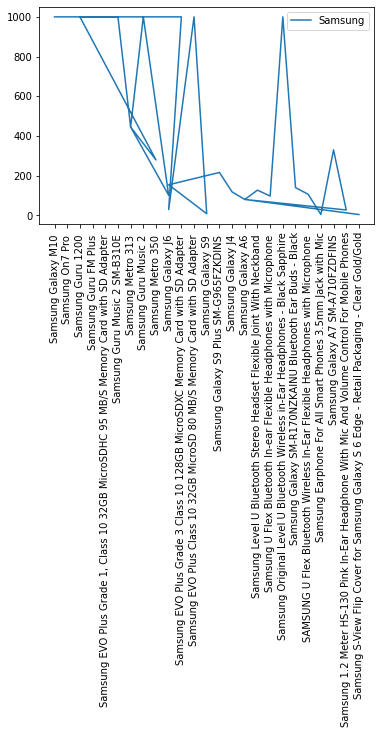

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

blist=['Samsung']

for i in blist:
  pltdata=data_new[data_new.by_info == i]
  plt.plot(pltdata.Prod_name,pltdata.ans_ask)
plt.xticks(rotation=90)
plt.legend(blist)

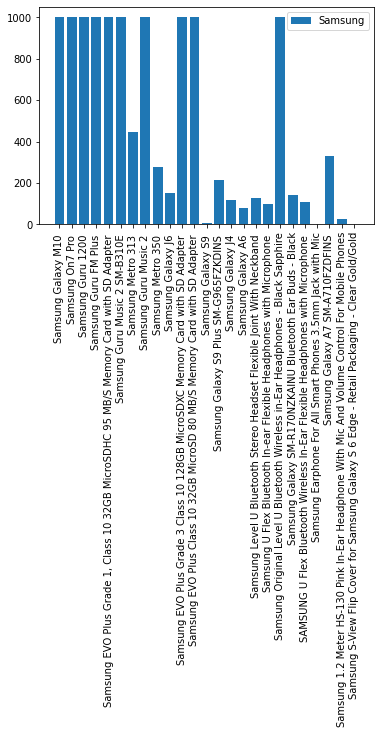

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

blist=['Samsung']

for i in blist:
  pltdata=data_new[data_new.by_info == i]
  plt.bar(pltdata.Prod_name,pltdata.ans_ask)
plt.xticks(rotation=90)
plt.legend(blist)

Text(0, 0.5, 'ans_ask')

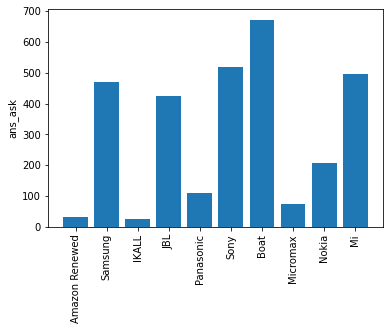

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(top[:10],data_aggre.loc[top[:10]].ans_ask)
plt.xticks(rotation=90)
plt.ylabel('ans_ask')

Text(0, 0.5, 'Rating')

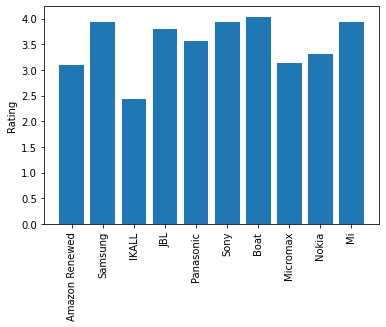

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(top[:10],data_aggre.loc[top[:10]].rating)
plt.xticks(rotation=90)
plt.ylabel('Rating')

Text(0, 0.5, 'Product_price')

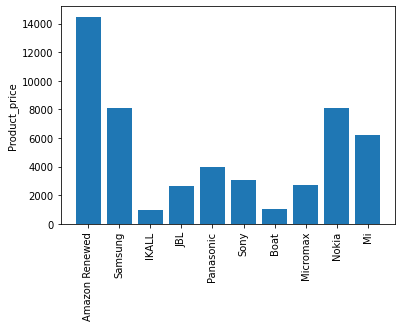

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(top[:10],data_aggre.loc[top[:10]].Product_price)
plt.xticks(rotation=90)
plt.ylabel('Product_price')

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(top[:10],data_aggre.loc[top[:10]].cust_review_pol)
plt.xticks(rotation=90)
plt.ylabel('cust_review_pol	')

In [39]:
data_aggre=data_new.groupby(by='by_info').mean()

In [40]:
data_aggre.loc[top[:20]]

,Product_price,rating,total_review,ans_ask,cust_review_pol,cust_review_sub
Amazon Renewed,14468.543478,3.089130,17.478261,30.913043,0.211618,0.550691
Samsung,8121.675000,3.942500,3213.000000,471.175000,0.244762,0.503429
IKALL,960.410256,2.443590,43.333333,26.333333,0.005121,0.577061
JBL,2650.666667,3.794872,3729.512821,425.615385,0.229170,0.514325
Panasonic,3974.685714,3.565714,332.142857,109.171429,0.167534,0.514645
Sony,3092.090909,3.933333,1409.939394,517.575758,0.201937,0.513514
Boat,1067.343750,4.037500,12124.031250,671.687500,0.224779,0.534802
Micromax,2685.300000,3.146667,91.466667,75.766667,0.132226,0.485353
Nokia,8066.296296,3.303704,288.962963,205.740741,0.181257,0.481390
Mi,6230.916667,3.937500,5536.750000,494.583333,0.170840,0.521250
